In [1]:
import numpy as np
import astropy.units as u
from astropy.io import fits

import time
import os
from pathlib import Path

import poppy

import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
platform = jax.devices()[0].platform
device = jax.devices()[0].device_kind

print(f'Jax platform: {platform}')
print(f'Jax device: {device}')

import utils
import imshows
from imshows import *

wavelength = 633*u.nm
pupil_diam = 7.4*u.mm
fl = 150*u.mm
fnum = fl.to_value(u.mm)/pupil_diam.to_value(u.mm)

um_per_lamD = wavelength.to(u.um) * fnum
pixelscale_m = 3.45e-6
pixelscale_lamD = pixelscale_m / um_per_lamD.to_value(u.m)
print(pixelscale_m, pixelscale_lamD)

def pad_or_crop( arr_in, npix ):
    n_arr_in = arr_in.shape[0]
    if n_arr_in == npix:
        return arr_in
    elif npix < n_arr_in:
        x1 = n_arr_in // 2 - npix // 2
        x2 = x1 + npix
        arr_out = arr_in[x1:x2,x1:x2]
    else:
        arr_out = jnp.zeros((npix,npix), dtype=arr_in.dtype)
        x1 = npix // 2 - n_arr_in // 2
        x2 = x1 + n_arr_in
        arr_out = arr_out.at[x1:x2,x1:x2].set(arr_in)
    return arr_out

def crop(im, xc,yc,nim):
    return im[xc-nim//2:xc+nim//2, yc-nim//2:yc+nim//2]

def sum_ims(ims, exp_times, sat_thresh=100, nbits=12, plot=False, bias=None):
    total_flux = 0.0
    pixel_weights = 0.0
    for i in range(ims.shape[0]):
        frame = ims[i]
        exp_time = exp_times[i]
        pixel_sat_mask = frame > (2**nbits - sat_thresh)

        if bias is not None:
            frame -= bias
        
        pixel_weights += ~pixel_sat_mask
        flux_im = frame/exp_time
        flux_im[pixel_sat_mask] = 0 # mask out the saturated pixels

        if plot: 
            imshows.imshow3(pixel_sat_mask, frame, flux_im, 
                            'Pixel Saturation Mask', 
                            f'Frame:\nExposure Time = {exp_time}s', 
                            'Masked Flux Image', 
                            lognorm2=True, lognorm3=True)
            
        total_flux += flux_im
        
    total_flux_im = total_flux/pixel_weights

    return total_flux_im

Jax platform: gpu
Jax device: NVIDIA A100 80GB PCIe
3.45e-06 0.26887835703001584


# Load in data

In [2]:
long_defocus = np.array([ -3, -2, -1, +1, +2, +3, +4]) # in mm
nim = 128

2330.0 4095.0 4095.0


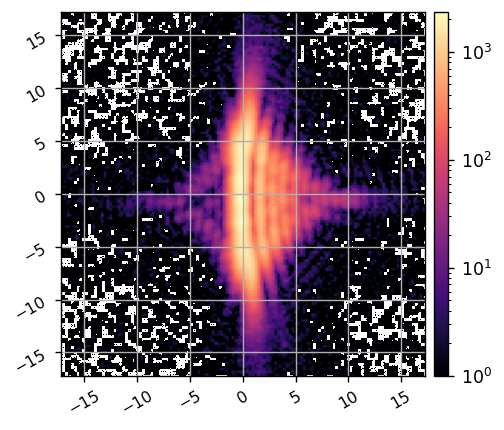

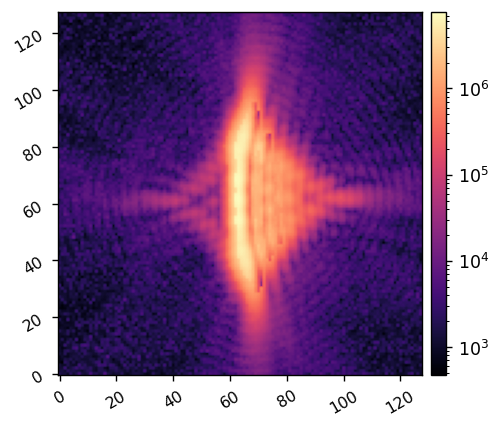

In [3]:
xc = 540
yc = 905
tiff1 = f'data-fl150-pd7-tilted/defocus_{long_defocus[0]:d}mm_300us.tiff'
tiff2 = f'data-fl150-pd7-tilted/defocus_{long_defocus[0]:d}mm_3000us.tiff'
tiff3 = f'data-fl150-pd7-tilted/defocus_{long_defocus[0]:d}mm_30000us.tiff'
im_def_1 = crop(plt.imread(tiff1), xc, yc, nim)/16
im_def_2 = crop(plt.imread(tiff2), xc, yc,  nim)/16
im_def_3 = crop(plt.imread(tiff3), xc, yc, nim)/16

print(im_def_1.max(), im_def_2.max(), im_def_3.max())

imshow1(im_def_1, lognorm=True, pxscl=pixelscale_lamD, grid=True,
        # axlims=[55, 71, 55, 71],
        )
ims = np.array([im_def_1, im_def_2, im_def_3])
exp_times_def = [300e-6, 3000e-6, 30000e-6]

total_im_def1 = sum_ims(ims, exp_times_def, 
                        # plot=True,
                        )
imshow1(total_im_def1, lognorm=True)

1819.0 4095.0 4095.0


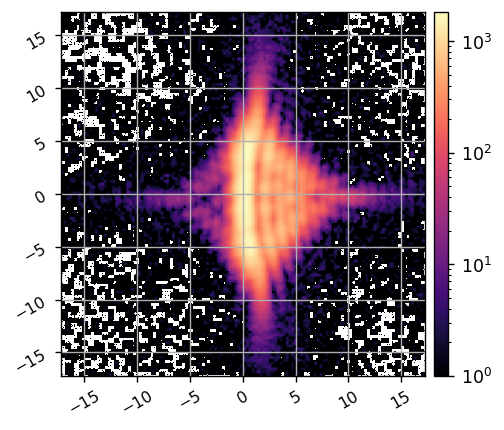

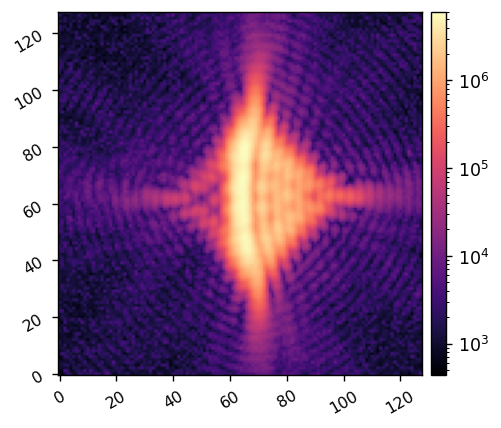

In [4]:
xc = 540
yc = 905
tiff1 = f'data-fl150-pd7-tilted/defocus_{long_defocus[1]:d}mm_300us.tiff'
tiff2 = f'data-fl150-pd7-tilted/defocus_{long_defocus[1]:d}mm_3000us.tiff'
tiff3 = f'data-fl150-pd7-tilted/defocus_{long_defocus[1]:d}mm_30000us.tiff'
im_def_1 = crop(plt.imread(tiff1), xc, yc, nim)/16
im_def_2 = crop(plt.imread(tiff2), xc, yc,  nim)/16
im_def_3 = crop(plt.imread(tiff3), xc, yc, nim)/16

print(im_def_1.max(), im_def_2.max(), im_def_3.max())

imshow1(im_def_1, lognorm=True, pxscl=pixelscale_lamD, grid=True,
        # axlims=[55, 71, 55, 71],
        )
ims = np.array([im_def_1, im_def_2, im_def_3])
exp_times_def = [300e-6, 3000e-6, 30000e-6]

total_im_def2 = sum_ims(ims, exp_times_def, 
                        # plot=True,
                        )
imshow1(total_im_def2, lognorm=True)

1786.0 4095.0 4095.0


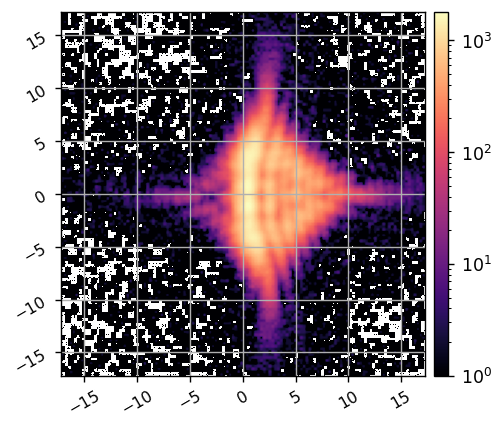

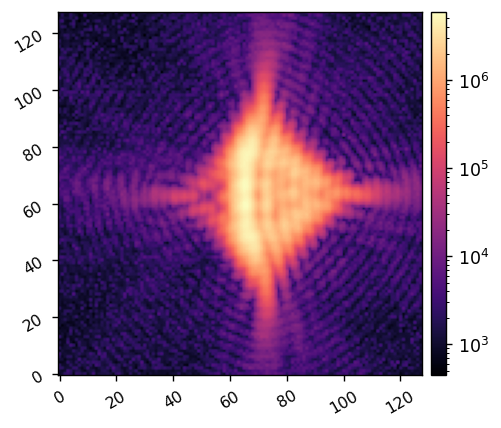

In [5]:
xc = 540
yc = 905
tiff1 = f'data-fl150-pd7-tilted/defocus_{long_defocus[2]:d}mm_300us.tiff'
tiff2 = f'data-fl150-pd7-tilted/defocus_{long_defocus[2]:d}mm_3000us.tiff'
tiff3 = f'data-fl150-pd7-tilted/defocus_{long_defocus[2]:d}mm_30000us.tiff'
im_def_1 = crop(plt.imread(tiff1), xc, yc, nim)/16
im_def_2 = crop(plt.imread(tiff2), xc, yc,  nim)/16
im_def_3 = crop(plt.imread(tiff3), xc, yc, nim)/16

print(im_def_1.max(), im_def_2.max(), im_def_3.max())

imshow1(im_def_1, lognorm=True, pxscl=pixelscale_lamD, grid=True,
        # axlims=[55, 71, 55, 71],
        )
ims = np.array([im_def_1, im_def_2, im_def_3])
exp_times_def3 = [300e-6, 3000e-6, 30000e-6]

total_im_def3 = sum_ims(ims, exp_times_def3, 
                        # plot=True,
                        )
imshow1(total_im_def3, lognorm=True)

1503.0 4095.0 4095.0


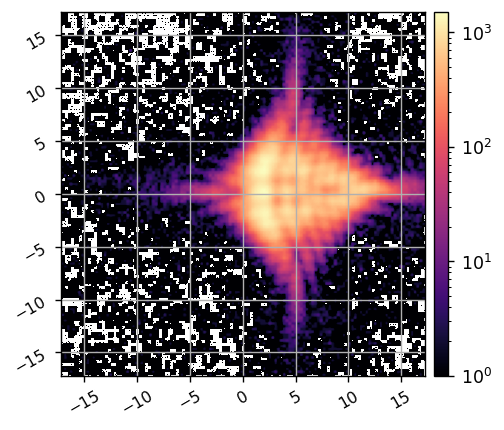

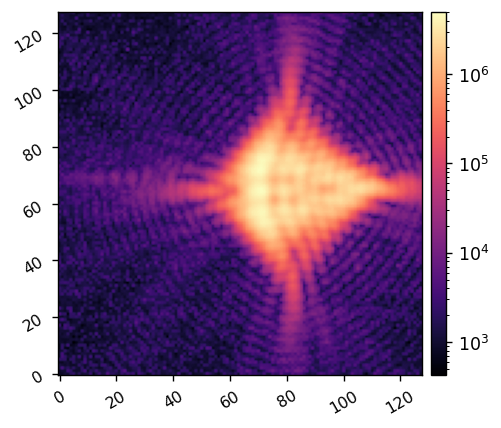

In [6]:
xc = 540
yc = 905
tiff1 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[3]:d}mm_300us.tiff'
tiff2 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[3]:d}mm_3000us.tiff'
tiff3 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[3]:d}mm_30000us.tiff'
im_def_1 = crop(plt.imread(tiff1), xc, yc, nim)/16
im_def_2 = crop(plt.imread(tiff2), xc, yc,  nim)/16
im_def_3 = crop(plt.imread(tiff3), xc, yc, nim)/16

print(im_def_1.max(), im_def_2.max(), im_def_3.max())

imshow1(im_def_1, lognorm=True, pxscl=pixelscale_lamD, grid=True,
        # axlims=[55, 71, 55, 71],
        )
ims = np.array([im_def_1, im_def_2, im_def_3])
exp_times_def = [300e-6, 3000e-6, 30000e-6]

total_im_def4 = sum_ims(ims, exp_times_def, 
                        # plot=True,
                        )
imshow1(total_im_def4, lognorm=True)

1422.0 4095.0 4095.0


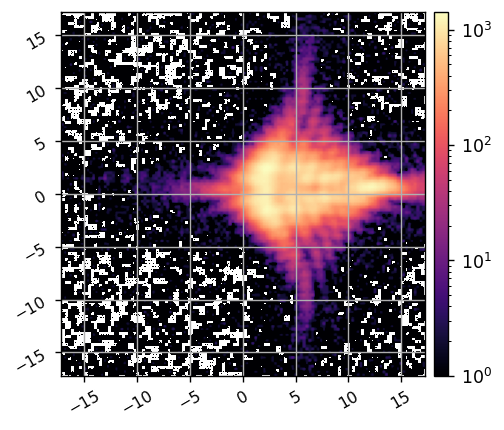

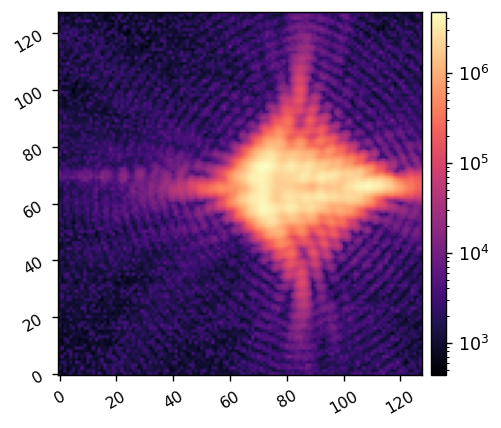

In [7]:
xc = 540
yc = 905
tiff1 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[4]:d}mm_300us.tiff'
tiff2 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[4]:d}mm_3000us.tiff'
tiff3 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[4]:d}mm_30000us.tiff'
im_def_1 = crop(plt.imread(tiff1), xc, yc, nim)/16
im_def_2 = crop(plt.imread(tiff2), xc, yc,  nim)/16
im_def_3 = crop(plt.imread(tiff3), xc, yc, nim)/16

print(im_def_1.max(), im_def_2.max(), im_def_3.max())

imshow1(im_def_1, lognorm=True, pxscl=pixelscale_lamD, grid=True,
        # axlims=[55, 71, 55, 71],
        )

ims = np.array([im_def_1, im_def_2, im_def_3])
exp_times_def = [300e-6, 3000e-6, 30000e-6]

total_im_def5 = sum_ims(ims, exp_times_def, 
                        # plot=True,
                        )
imshow1(total_im_def5, lognorm=True)

1809.0 4095.0 4095.0


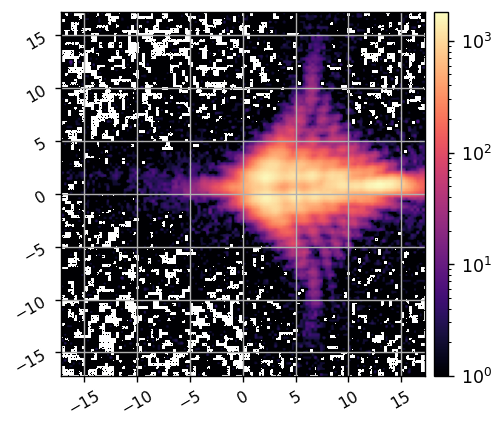

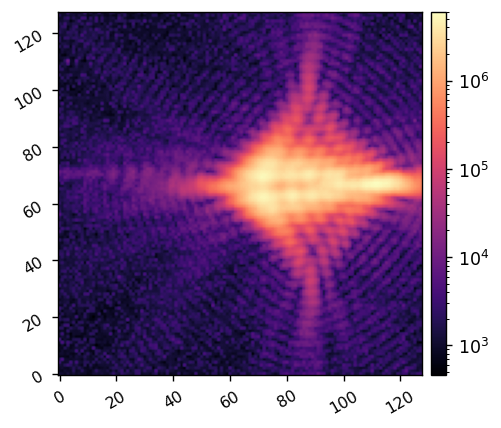

In [11]:
xc = 540
yc = 905
tiff1 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[5]:d}mm_300us.tiff'
tiff2 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[5]:d}mm_3000us.tiff'
tiff3 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[5]:d}mm_30000us.tiff'
im_def_1 = crop(plt.imread(tiff1), xc, yc, nim)/16
im_def_2 = crop(plt.imread(tiff2), xc, yc,  nim)/16
im_def_3 = crop(plt.imread(tiff3), xc, yc, nim)/16

print(im_def_1.max(), im_def_2.max(), im_def_3.max())

imshow1(im_def_1, lognorm=True, pxscl=pixelscale_lamD, grid=True,
        # axlims=[55, 71, 55, 71],
        )

ims = np.array([im_def_1, im_def_2, im_def_3])
exp_times_def = [300e-6, 3000e-6, 30000e-6]

total_im_def6 = sum_ims(ims, exp_times_def, 
                        # plot=True,
                        )
imshow1(total_im_def6, lognorm=True)

2386.0 4095.0 4095.0


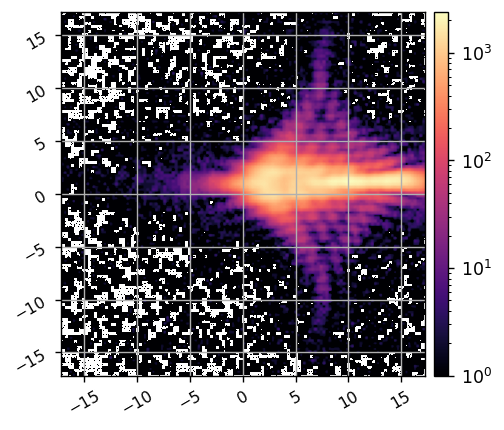

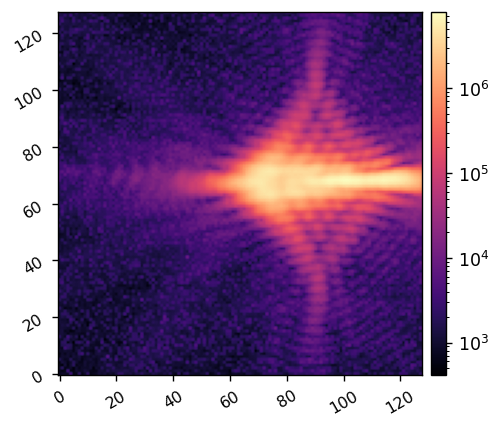

In [12]:
xc = 540
yc = 905
tiff1 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[6]:d}mm_300us.tiff'
tiff2 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[6]:d}mm_3000us.tiff'
tiff3 = f'data-fl150-pd7-tilted/defocus_+{long_defocus[6]:d}mm_30000us.tiff'
im_def_1 = crop(plt.imread(tiff1), xc, yc, nim)/16
im_def_2 = crop(plt.imread(tiff2), xc, yc,  nim)/16
im_def_3 = crop(plt.imread(tiff3), xc, yc, nim)/16

print(im_def_1.max(), im_def_2.max(), im_def_3.max())

imshow1(im_def_1, lognorm=True, pxscl=pixelscale_lamD, grid=True,
        # axlims=[55, 71, 55, 71],
        )

ims = np.array([im_def_1, im_def_2, im_def_3])
exp_times_def = [300e-6, 3000e-6, 30000e-6]

total_im_def7 = sum_ims(ims, exp_times_def, 
                        # plot=True,
                        )
imshow1(total_im_def7, lognorm=True)

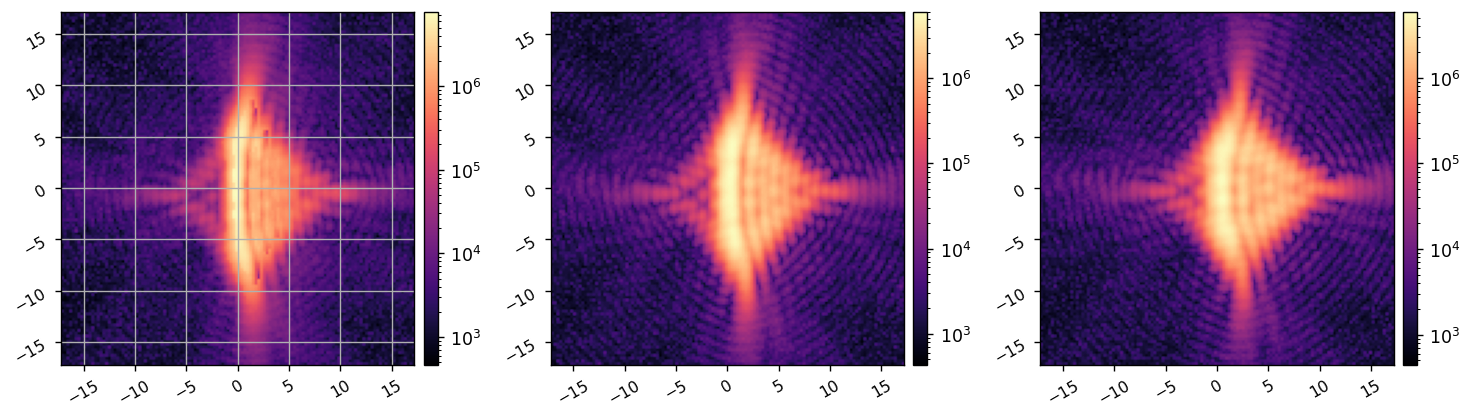

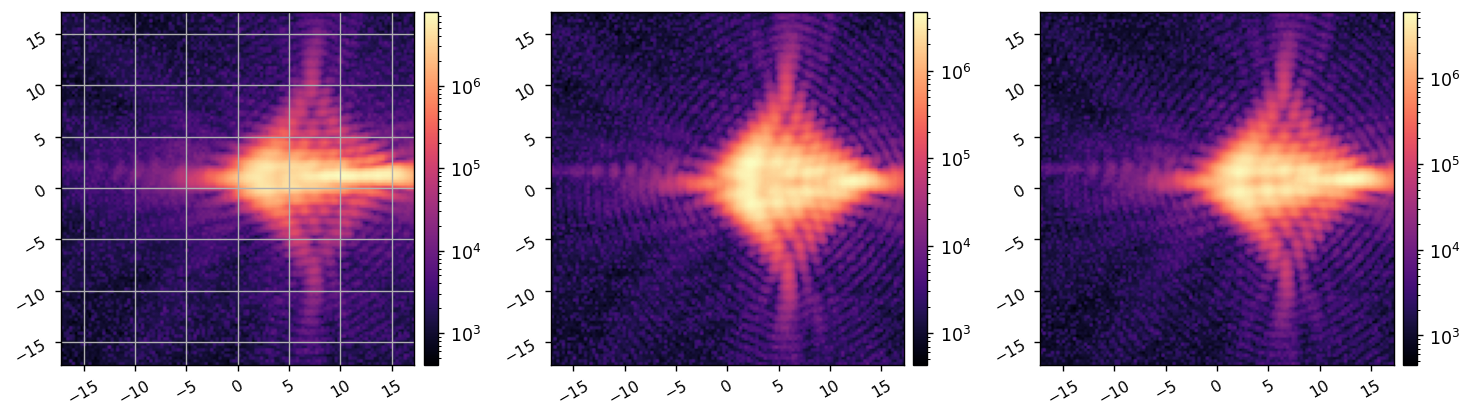

In [13]:
imshow3(total_im_def1, total_im_def2, total_im_def3, lognorm=True, pxscl=pixelscale_lamD, grid=True)
imshow3(total_im_def4, total_im_def5, total_im_def6, lognorm=True, pxscl=pixelscale_lamD, grid=True)

# Make the model and run the estimation

In [7]:
npix = 512
wf = poppy.FresnelWavefront(beam_radius=pupil_diam/2, npix=npix, oversample=1)
ap = poppy.NgonAperture(nsides=14, radius=pupil_diam/2).get_transmission(wf)

Oversampling > 2x suggested for reliable results in Fresnel propagation.


In [139]:
utils.save_fits(f'aperture_14_{npix:d}.fits', ap.get())

Saved data to:  aperture_14_512.fits


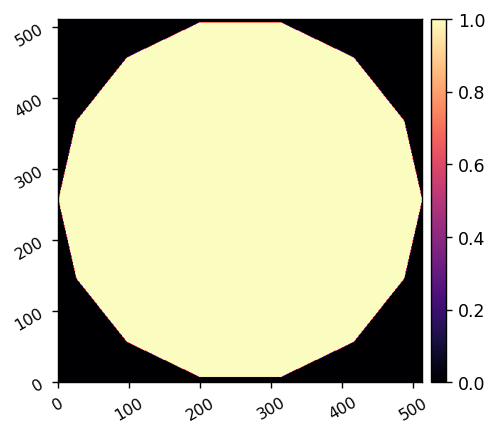

In [8]:
npix = 512
ap = jnp.asarray(fits.getdata(f'aperture_14_{npix:d}.fits'))
imshow1(ap)

In [84]:
!nvidia-smi

Tue Apr 30 21:18:24 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.67                 Driver Version: 550.67         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100 80GB PCIe          Off |   00000000:25:00.0 Off |                    0 |
| N/A   35C    P0             63W /  300W |   77706MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# Initialize the model and do the estimation

In [9]:
import estimation
import model

wavelengths = jnp.array([wavelength.to_value(u.m)])
spectrum = jnp.linspace(1, 1, num=1)

In [20]:
long_defocus/1000

array([-0.002, -0.001,  0.003,  0.004])

In [19]:
fnum

20.27027027027027

In [41]:
print(long_defocus)

nim = 64

mod = model.ForwardModel(npix, nim, fnum, pixelscale_m, 
                           wavelength.to_value(u.m), wavelengths, 
                           long_defocus/1000/2, 
                        #    spectrum=spectrum, 
                           )


[-2 -1  3  4]


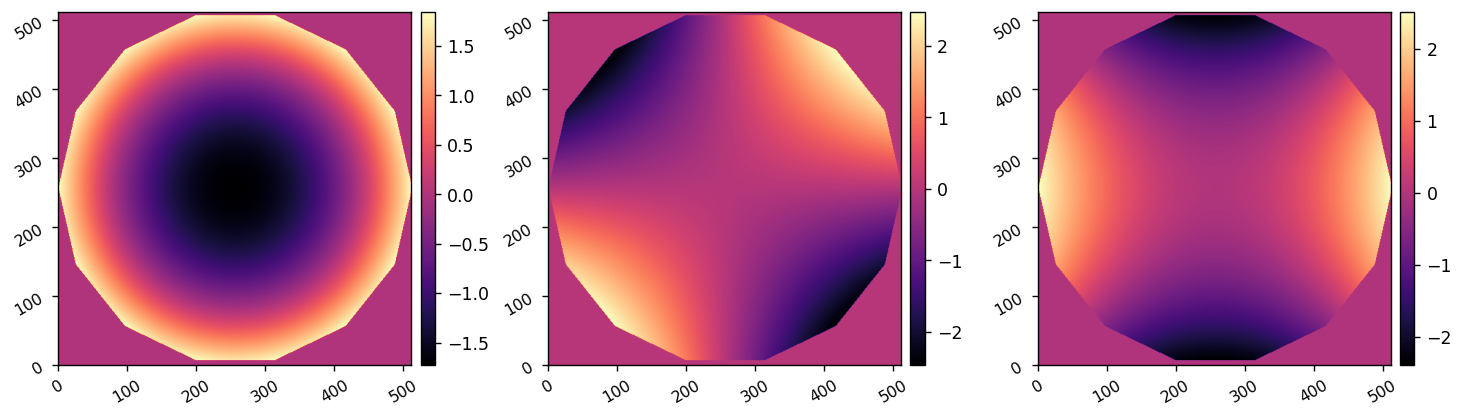

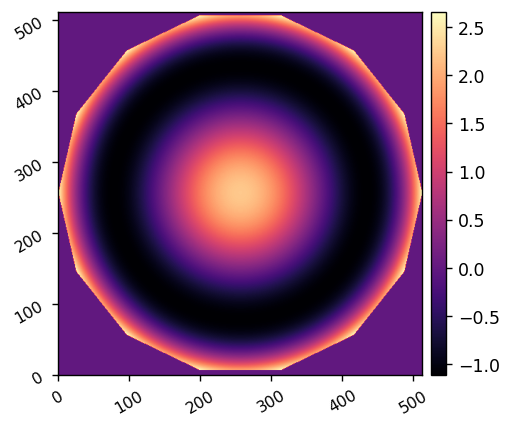

In [42]:
nmodes = 10
zmodes = poppy.zernike.arbitrary_basis(ap, nterms=nmodes+3, outside=0)[3:]
modes = zmodes.reshape(nmodes, npix**2).T
imshow3(zmodes[0], zmodes[1], zmodes[2])
imshow1(zmodes[7])

In [43]:
# estimator = estimation.Estimation(mod, estimate_phase=True, maxiter=1000, wreg=1e-10)
# estimator = estimation.Estimation(mod, estimate_phase=True, estimate_amplitude=True, maxiter=100, wreg=1e-2)

estimator = estimation.Estimation(mod, estimate_phase=True, maxiter=100, wreg=1e-6,
                                  phase_modal=True, 
                                  modes=jnp.asarray(zmodes.get()))

In [44]:
psfs = jnp.array([total_im_def1, total_im_def2, total_im_def3, total_im_def4])

In [45]:
fit, err, objvals = estimator.run(psfs, ap)

INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.9821665836789554 Stepsize:1.0  Decrease Error:0.9821665836789554  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 0.9842887740562037 Stepsize:0.4999999999991356  Decrease Error:0.9842887740562037  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 3 Minimum Decrease & Curvature Errors (stop. crit.): 0.9843339199931957 Stepsize:0.21132486540382112  Decrease Error:0.9843339199931957  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 4 Minimum Decrease & Curvature Errors (stop. crit.): 0.9615508058577623 Stepsize:0.0921961441877895  Decrease Error:0.9615508058577623  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 5 Minimum Decrease & Curvature Errors (stop. crit.): 0.9832371547848927 Stepsize:0.040004514618457436  Decrease Error:0.9832371547848927  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 6 Minimum Decreas

2024-05-01 10:23:44.541254: E external/org_tensorflow/tensorflow/compiler/xla/python/pjit.cc:461] fastpath_data is none


INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 3.5078516506773218e-34 Stepsize:1.0  Decrease Error:0.0  Curvature Error:3.5078516506773218e-34 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 5.1033647532594004e-33 Stepsize:1.0  Decrease Error:4.528447591608606e-33  Curvature Error:5.1033647532594004e-33 
INFO: jaxopt.ZoomLineSearch: Iter: 2 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.5  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:0.75  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 0.0 Stepsize:1.0  Decrease Error:0.0  Curvature Error:0.0 
INFO: jaxopt.ZoomLineSearch: Iter: 1 Minimum Decrease & Curvature Errors (stop. crit.): 4.922612182808724e-35 Stepsize:1.0  Decrease Error:0.0  Curvature Error:4.92261218

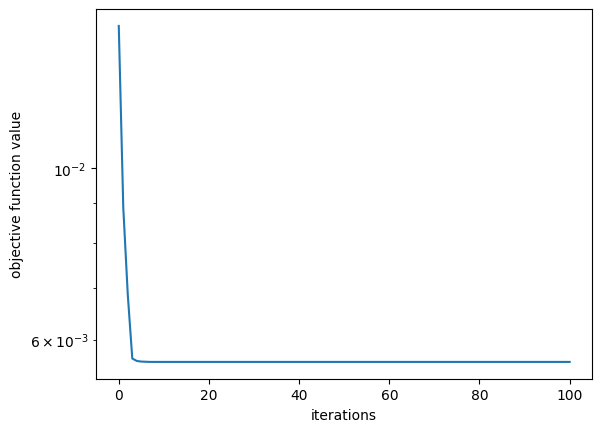

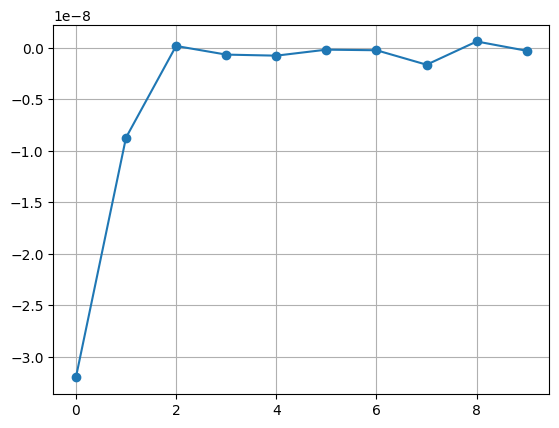

In [46]:
plt.semilogy(objvals)
plt.xlabel('iterations')
plt.ylabel('objective function value')
plt.show()

plt.plot(range(nmodes), fit[-1], '-o')
plt.grid()

In [47]:
fit[-1]

Array([-3.19918458e-08, -8.72101560e-09,  1.78204537e-10, -6.59211408e-10,
       -7.61172967e-10, -1.79159619e-10, -2.36363918e-10, -1.64008340e-09,
        6.14687461e-10, -2.89643052e-10], dtype=float64)

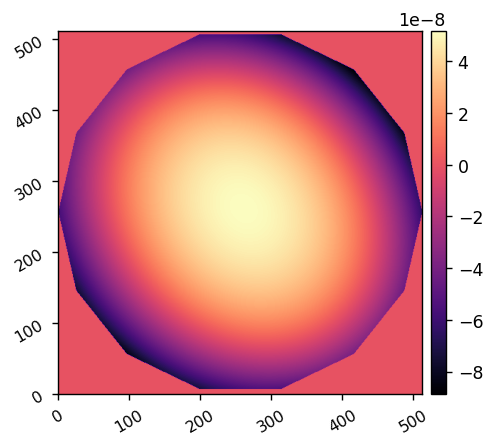

In [48]:
opd_est = modes.get().dot(fit[-1]).reshape(npix,npix)
est_wfe = ap*(opd_est)
imshow1(est_wfe)

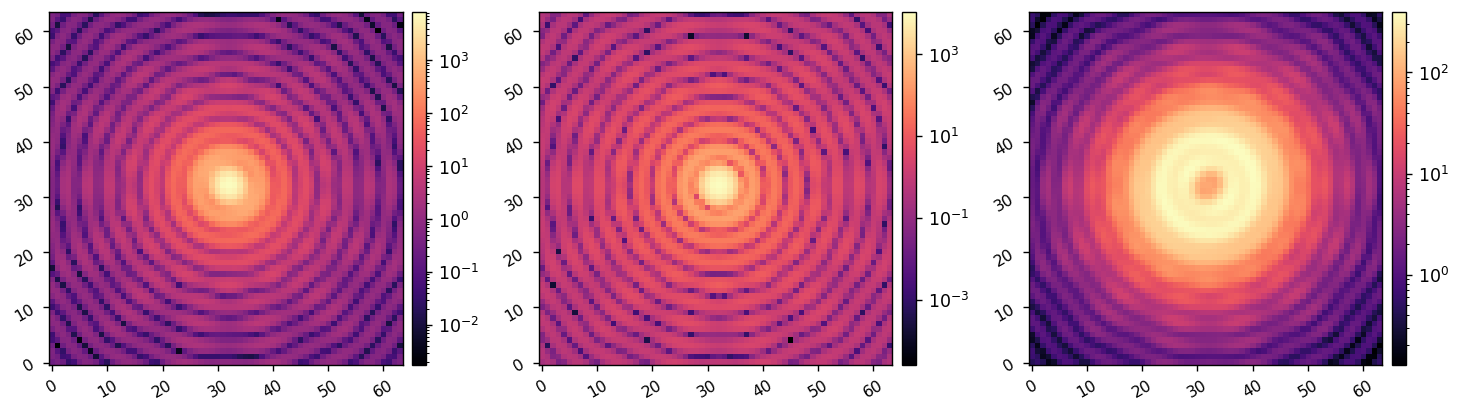

In [51]:
model_psfs = model.forward_propagate(ap, est_wfe, mod.wavelengths, mod.fresnel_TFs, mod.Mx, mod.My)
imshow3(model_psfs[0], model_psfs[1], model_psfs[3], lognorm=True, npix3=64)

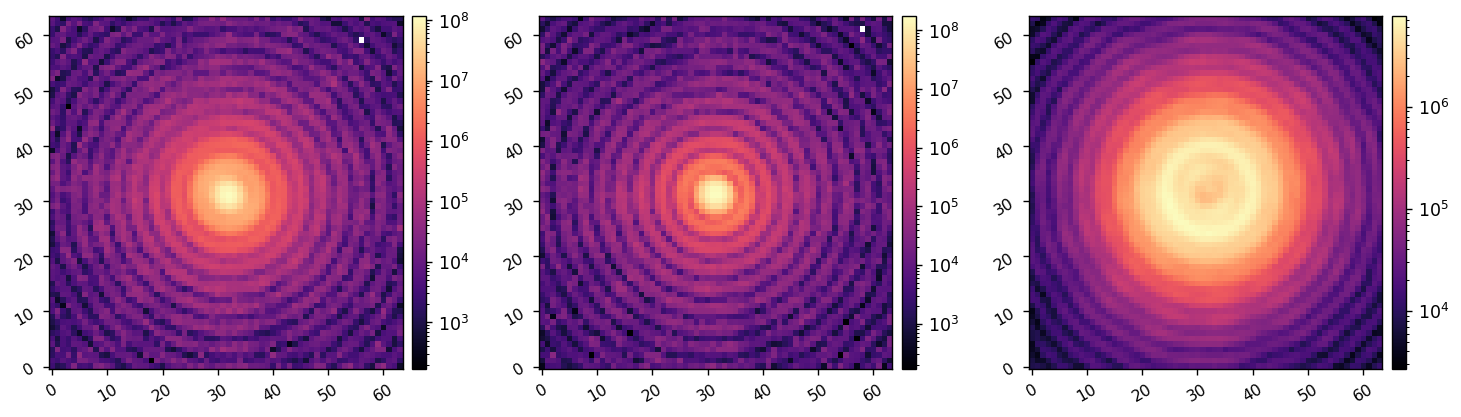

In [50]:
imshow3(psfs[0], psfs[1], psfs[4], lognorm=True, npix3=64)